# Report

## Index

    Setup

    1. Introduction and Data
        1.1 Introduction and Motivation
        1.2 Research Question
        1.3 Data
            1.3.1 Data Origin
            1.3.2 Data Structure
            1.3.3 Data Corrections
            1.3.4 Data Dictionary
            1.3.5 Definition Key Variables
            1.3.6 Data Splitting
            1.3.7 Exploratory Data Analysis
    2. Methodology
        2.1 Lineare Regression
            2.1.1 Variablenoptimierung
            2.1.2 Eliminierung von Ausreißern
        2.2 Logistische Regression 
            2.2.1 Resampling
            2.2.2 Threshold Optimierung
            2.2.3 Reduktion der Predictorvariablen
    3. Results
        2.1 Lineare Regression
            2.1.1 Final model
            2.1.2 Results of the model
            2.1.3 Results research question
        2.2 Logistische Regression
            2.1.1 Final model
            2.1.2 Results of the model
            2.1.3 Results research question
    4. Discussion and Conclusion
        4.1 Summary
        4.2 Limitations
        4.3 Ideas for future work

## Setup

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from joblib import dump, load
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## 1. Introduction and data

### 1.1 Introduction and motivation

### 1.2 Research question

**Forschungsfrage:**
In dieser Studie wird durch die Analyse weiblicher Nutzerprofile aus dem Jahr 2015 untersucht, welche Voraussetzungen ein Profil erfüllen muss, um seine Chancen auf virtuelle Interaktion zu erhöhen. Diese Erkenntnisse ermöglichen nicht nur eine personalisierte Optimierung von Profilen für individuellen Erfolg, sondern eröffnen auch Einblicke in soziokulturelle Dynamiken und digitale Kommunikationsstrategien.

**Hypothese 1 - Lineare Regression:**
Die erste Hypothese lautet, dass die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, die Anzahl der Fans und generierten Kisses sowie das Alter der Person signifikante Einflussfaktoren auf die Anzahl der Profilbesuche sind. Es wird erwartet, dass Profile mit detaillierteren Informationen, mehr Bildern, höherer Fananzahl und mehr generierten Kisses tendenziell mehr Profilbesuche generieren. Die Hypothese lautet daher: "Die Anzahl der Profilbesuche kann anhand der vorliegenden Nutzerdaten durch eine lineare Regression vorhergesagt werden."

**Hypothese 2 - Logistische Regression:**
Die zweite Hypothese besagt, dass bestimmte Eigenschaften eines Accounts entscheidend sind, um Fans zu generieren, also andere Nutzer dazu zu bewegen, dem Profil zu folgen. Es wird erwartet, dass die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, die Anzahl der Profilbesuche, generierten Kisses und das Alter der Person signifikante Prädiktoren für das Generieren von Fans sind. Die Hypothese lautet daher: "Anhand der Nutzerdaten kann vorhergesagt werden, ob ein Profil das Potenzial hat, mindestens einen Fan zu generieren oder nicht, durch eine logistische Regression."

Diese Forschungsfragen und Hypothesen werden im Verlauf des Projekts durch die Analyse von weiblichen Nutzerprofilen und die Anwendung entsprechender statistischer Modelle weiter untersucht und validiert.

### 1.3 Data

#### 1.3.1 Data origin

Die Erhebung der Daten für den Datensatz erfolgte im Frühjahr 2015 durch gezielte Erfassung von Nutzerprofilinformationen auf Lovoo. Für diese Zwecke wurden eigens vom Urheber entwickelte Tools eingesetzt, die es ermöglichten, während der Nutzung der Plattform, des Aufrufens von Profilen und Stellens von Suchanfragen präzise Daten zu sammeln.

Um die Datenerhebung durchzuführen, wurden zwei Profile erstellt, die den Empfehlungen des Lovoo-Algorithmus folgten. Diese Profile waren auf die Person und die Interessen des Urhebers ausgerichtet und signalisierten Offenheit für Freundschaften, Chats und Dates. Da der Urheber männlich und ausschließlich auf der Suche nach Frauen ist, sind diese Faktoren bei Erstellung der Profile und der Auswahl potenzieller Matches durch den Algorithmus berücksichtigt. Folglich besteht der Datensatz ausschließlich aus weiblichen Nutzerprofilen. Um auch Daten für andere Geschlechter oder Altersgruppen zu erfassen, müsste eine separate Datenerhebung mit entsprechenden Profilen erfolgen.

Interessanterweise zeigte sich, dass der Empfehlungsalgorithmus von Lovoo häufig dieselben Nutzerprofile ausgab. Dies lässt darauf schließen, dass der Algorithmus wahrscheinlich stark auf Einstellungen wie den Standort angewiesen war, um Nutzer in der Nähe zu empfehlen. Möglicherweise spielten auch Cookies eine Rolle. Diese Faktoren führten dazu, dass die Anzahl der unterschiedlichen Nutzerprofile, die in den Datensatz aufgenommen wurden, begrenzt war.

#### 1.3.2 Data structure

In [2]:
URL = 'https://raw.githubusercontent.com/DA-Statistics-Nadine-Alena/project/main/references/LOVOO_Daten.csv'
df = pd.read_csv(URL)

In [3]:
df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,1.0,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,1.0,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,1.0,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,1.0,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,1.0,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3855 non-null   object 
 1   genderLooking           3428 non-null   object 
 2   age                     3428 non-null   float64
 3   name                    3428 non-null   object 
 4   counts_details          3426 non-null   float64
 5   counts_pictures         3426 non-null   float64
 6   counts_profileVisits    3426 non-null   float64
 7   counts_kisses           3426 non-null   float64
 8   counts_fans             3426 non-null   float64
 9   counts_g                3426 non-null   float64
 10  flirtInterests_chat     3426 non-null   object 
 11  flirtInterests_friends  3426 non-null   object 
 12  flirtInterests_date     3426 non-null   object 
 13  country                 3426 non-null   object 
 14  city                    3158 non-null   

#### 1.3.3 Data corrections

Um den vorliegenden Datensatz für die lineare sowie logitsische Regression verwenden zu können, mussten Korrekturen an dem Datensatz vorgenommen werden.

**Entfernung von NaN-Werten**
Der Datensatz enthält einige Profildaten mit NaN-Werten. Zur besseren Modellierung wurden die Zeilen mit NaN-Werte aus dem Datensatz entfernt, da im linearen Regressionsmodellen keine Leerzellen bzw. NaN Werte akzeptiert werden. Die relevanten numerischen Spalten werden hierfür bereinigt, indem die Zeilen mit NaN Werten in den entsprechenden Spalten herausgefiltert udn entfernt werden.

**Hinzufügen der Variable "fans"**
Die Variable "counts_fans" wird in eine kategoriale Variable umgewandelt, sodass diese für die logistische Regression angewendet werden kann. Dem DataFrame wird eine neue Spalte hinzugefügt, die Angibt, ob das in der Zeile repräsentierte Profil über Fans verfügt oder nicht. Grundlage dabei ist die Spalte "counts_fans", ist die dort eingetragene Zahl größer als Eins, so wird das Profil in der neuen Spalte "fans" mit einer 1 gekennzeichnet. Verfügt das Profil laut "counts_fans" über keine Fans, erhält es in der Spalte "fans" eine 0.

**Korrektur von fehlerhaften Zeilen**
Bei genauer Betrachtung der Ausprägungen in der Spalte Gender, so fällt auf, dass die zugrunde liegende csv-Tablle in einigen Zeilen fehlerhaft war, weshalb dort in der entsprechenden Spalte keine der erwarteten Ausprägungen F (= Frau), M (= Mann) und none (= keine Angabe) vermerkt ist. Die fehlerhaft Datenstruktur erstreckt sich über die ganze Zeile der betreffenden Profile, weshalb sie identifiziert und entfernt werden müssen. Hierzu werden die obengenannten Ausprägungen als accepted Values festgelegt, um die übrigen Zeilen mit anderen Werten herauszufiltern.

**Entfernung von nicht verwendeten Spalten**
Der Datensatz enthält viele Spalten die für die nachfolgende Modellierung irrelevant sind. Aus diesem Grund werden diese Spalten aus dem Datensatz entfernt.

Der bereinigte Datensatz wird als csv-Datei abgespeichert und kann so für das weitere Vorgehen importiert werden.

In [5]:
URLc = 'https://raw.githubusercontent.com/DA-Statistics-Nadine-Alena/project/main/reports/data_corrected.csv'
df = pd.read_csv(URLc)

#### 1.3.4 Data dictionary

In [6]:
data = {
    'Name': ['counts_profileVisits', 'counts_details', 'age', 'counts_pictures', 'counts_kisses', 'counts_fans', 'fans'],
    'Description': ['Anzahl der Besuche anderer Nutzer auf dem betrachteten Profil', 'Anteil der auf dem Profil gefüllen Accountdetails', 'Alter des Profilinhabers', 'Anzahl der auf dem Profil hochgeladenen Bilder', 'Anzahl der für das Profil vergebenen Kisses (ähnlich den Likes auf Instagram)', 'Anzahl der Fans des Profils, ähnlich Follower auf anderen Plattformen', 'Binerische Angabe, ob ein Profil über Fans verfügt oder nicht '],
    'Role': ['Response', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Response'],
    'Type': ['numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'nominal'],
    'Format': ['float', 'float', 'float', 'float', 'float','float', 'category']
}


data_dictionary = pd.DataFrame(data)
data_dictionary

,Name,Description,Role,Type,Format
0,counts_profileVisits,Anzahl der Besuche anderer Nutzer auf dem betr...,Response,numerisch,float
1,counts_details,Anteil der auf dem Profil gefüllen Accountdetails,Predictor,numerisch,float
2,age,Alter des Profilinhabers,Predictor,numerisch,float
3,counts_pictures,Anzahl der auf dem Profil hochgeladenen Bilder,Predictor,numerisch,float
4,counts_kisses,Anzahl der für das Profil vergebenen Kisses (ä...,Predictor,numerisch,float
5,counts_fans,"Anzahl der Fans des Profils, ähnlich Follower ...",Predictor,numerisch,float
6,fans,"Binerische Angabe, ob ein Profil über Fans ver...",Response,nominal,category


#### 1.3.5 Defintion Key variables

Der zugrundeliegende Datensatz ist sehr umfassend. Da nicht alle Variablen für das Projekt relevant sind, werden im nachfolgenden nur die verwendeten Variablen näher erläutert.

age: In dieser Spalte wird das Alter des Profilinhabers angegeben. Das ermöglicht eine konkrete Suche nach Personen im gleichen Alter oder nach anderen präferierten Altersgruppen. Die Altersspanne im gewählten Datensatz bewegt sich zwischen 18 und 28.

counts_details: Diese Spalte gibt an, wie viele Angaben auf dem Profil gemacht wurden. Die Werte spiegeln den prozentualen Anteil an gefüllten Profildetails wieder, wobei 1 (also 100%) bedeutet, dass alle möglichen Angaben auf dem Profil getätigt wurden und 0 (0%), dass auf dem Profil bisher noch keine Informationen geteilt wurden.

counts_pictures: Diese Spalte gibt die Anzahl der Bilder an, die auf dem Account hochgeladen wurden. Mit hochgeladenen Bildern bekommt der Gegenüber eine Vorstellung vom Aussehen der potenziellen Matches und kann so auf sehr oberflächlicher Ebene mögliche Datingpartner selektieren.

counts_profileVisits: Profile Visits auf der Dating-Plattform Lovoo bezeichnen die Anzahl der Besuche, die das eigene Benutzerprofil von anderen Nutzern erhalten hat. Wenn jemand das eigene Profil aufruft, wird dies als "Profile Visit" gezählt. Dies gibt dem Benutzer einen Einblick, wie viele andere Mitglieder Interesse an seinem Profil zeigen, indem sie es besuchen. Profile Visits können in Dating-Apps wie Lovoo dazu beitragen, die allgemeine Aktivität und Attraktivität des eigenen Profils zu bewerten.

counts_kisses: "Kisses" sind Ausruck von Aufmerksamkeit auf der Plattform, die User verwenden können, um gegenüber anderen Nutzern ihr Interesse auszudrücken. Die virtuellen Küsse bieten die Möglichkeit, jemandem zu signalisieren, das Interesse an einem Kontaktaufbau besteht oder denjenigen auf das eigene Profil zu locken. In der Regel können Kisses gekauft oder durch bestimmte Aktionen auf der Plattform verdient werden.

counts_fans: Fan auf Lovoo wird man, indem man das Profil eines anderen Nutzers markiert und diesem folgt. Ähnlich wie bei anderen Social Media Kanälen wie z.B. Instagram, wird man dann über neue Beiträge eines Profils auf dem laufenden Gehalten und verliert dieses nicht aus den Augen.

##### Linear Regression

Die lineare Regression findet Anwendung um Merkmale eines Nutzerprofils auf Lovoo zu identifizieren, die Anzahl der Profilbesucher erhöhen um somit die Interaktion mit anderen Nutzern der Plattform zu steigern. Die **Responsevariable** ist "count_profileVisits". Ziel ist es, die Anzahl der Profilbesuche eines Accounts anhand ausgwählter Nutzungsdaten vorhersagen zu können. 

Mit Hilfe von EDA wurden die nachfolgenden Variablen als mögliche **Predictorvariablen** identifiziert.
- counts_details
- counts_pictures
- counts_kisses
- counts_fans

Um die Daten im Modell weiterzuverwenden, werden im nächsten Schritt die Spalten ausgewählt, die für die Modellierung relevant sind. Diesen wird dann ihre entsprechende Rolle als Responsevariable (y_label) oder Predictor (feature) zugeordnet, und anschließend als X und y Variable definiert.

In [7]:
y_label = 'counts_profileVisits'

features = df.drop(columns=[y_label,'gender','genderLooking','age', 'flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd','fans']).columns

X = df[features]

y = df[y_label]

##### Logistic Regression

Mit Hilfe von EDA wurden die nachfolgenden Variablen als mögliche Predictorvariablen identifiziert:
- age
- counts_details
- counts_pictures
- counts_profileVisits
- counts_kisses

Um die Daten im Modell weiterzuverwenden, werden im nächsten SChritt die Spalten ausgewählt, die für die Modellierung relevant sind. Diesen wird dann ihre entsprechende Rolle als Responsevariable (y_label) oder Predictor (feature) zugeordnet, und anschließend als X und y Variable definiert.

In [8]:
y_label_lor = 'fans'

features_lor = df.drop(columns=[y_label_lor, 'counts_fans', 'gender','genderLooking','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd']).columns

X_lor = df[features_lor]

y_lor = df[y_label_lor]

Insgesamt ist bei der Datenstructur des Datasets anzumerken, dass es viele IDs und zahlreiche numerische Variablen enthält, jedoch nur eine überschaubare Anzahl an numerischen Faktoren, die sich für eine Modellierung eignen. Dadurch waren wir in der Auswahl der Predictorvariablen stark eingeschränkt. Die wenigen numerischen Daten, die das Dataset vorzuweisen hat, haben aber alle eine gewisse fachliche Relevanz, weshalb sie für die Modellierung letztendlich auch geeignet waren. 

#### 1.3.6 Data Splitting

Für die Analyse werden die Daten in Trainings- und Testdaten unterteilt. Die Trennung wird für beide Modelle vorgenommen, damit eventuell notwendige Veränderungen an den Daten, wie beispielweise die Eliminierung von Ausreißern keine Auswirkungen auf das andere Modell haben. Die Trainingsdaten werden zum trainieren des Modell verwendet, wohingegen die Testdann wird für die Evaluierung der Güte des Modells benötigt werden. 

**Lineare Regression**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [10]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

**Logistische Regression**

In [11]:
X_train_lor, X_test_lor, y_train_lor, y_test_lor = train_test_split(X_lor, y_lor,test_size=0.2,random_state=42)

In [12]:
df_train_lor = pd.DataFrame(X_train_lor.copy())
df_train_lor = df_train_lor.join(pd.DataFrame(y_train_lor))

#### 1.3.7 Exploratory data analysis

##### Linear Regression

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counts_details,2740.0,0.553296,0.328496,0.0,0.31,0.62,0.85,1.0
counts_pictures,2740.0,4.620073,4.361264,0.0,2.00,3.00,6.00,30.0
counts_kisses,2740.0,146.070803,353.817951,0.0,10.00,39.50,132.00,6155.0
counts_fans,2740.0,2.186496,11.801258,0.0,0.00,0.00,0.00,241.0
counts_profileVisits,2740.0,3427.166788,6145.474818,0.0,356.00,1113.00,3798.50,58944.0


Die Tabelle lässt erkennen, dass die Daten einiger Variablen deutlich ungleich verteilt sind. Während der Anteil der auf dem Profil gegebenen Informationen noch recht gleichmäßig zwischen 0 und 1 liegt, scheint die Variable counts_prictures bereits rechtsschiefe Tendenzen aufzuweisen. Der Durchschnitt ist verglichen mit dem 50% Quartil leicht höher, der Abstand zwischen dem 25%-Quartil und dem 50%-Quartil ist dabei kleiner als der zwischen diesem und dem 75%-Quartil. Zudem liegt der Maximalwert 24 Bilder über dem 75%-Qaurtil, was auf Ausreißer nach rechts hindeutet.

Ein ähnliches, noch verstärktes Bild zeichnet sich bei der Variable counts_kisses. Auch hier liegt eine rechtsschiefe Verteilung vor. Der Abstand zwischen dem 75%-Quartil und dem Maximalwert ist dabei aber viel deutlicher und könnte sich stark auf die Qualität des Modells auswirken, weshalb die Auswirkung möglicher Ausreißer in jedem Fall näher betrachtet werden sollte.

Counts_fans weist eine sehr extreme Rechtsschiefe auf, bei der die Accounts ohne Fans deutlich ins Gewicht Fallen. Doch auch hier lässt der Maximalwert wieder auf Ausreißer schließen, die weit über dem durchschnittlichen Niveau der Variable liegen.

Die Responsevariable counts_profileVisits verhält sich sehr ähnlich den counts_kisses. Auch hier ist die Verteilung rechtsschief, der Mittelwert liegt über dem 50%-Quartil und der Maximalwert liegt deutlich über dem der Quartile.

Da die Daten innerhalb der Variablen so ungleich verteilt sind, sollte geprüft werden, ob sich das Modell eventuell nur für ein gewisses Spektrum an Profilen eignet.

In [14]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['counts_profileVisits'],
    column=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans', 'counts_details']
).interactive()

alt.RepeatChart(...)

Auf den ersten Blick ist auffällig, dass der Datensatz viele Nullwerte enthält, was die Offensichtlichkeit möglicher Zusammenhänge stark einschränkt. Am leichtesten Erkennbar ist eine Korrelation zwischen counts_profilVisits und counts_kisses. Hier wird anhand des Scatterplotts eine stark positive Beziehung sichtbar, weshalb die Variable in jedem Fall einen wichtigen Bestandteil des Modells darstellen wird. 

Ein leicht positiver Zusammenhang lässt sich auch zu counts_details erkennen, hier ist die Streuung jedoch schon wesentlich größer als noch bei counts_kisses.

Bei counts_pictures und counts_fans ist es deutlich schwieriger eine Korrelation festzustellen. Da ein Zusammenhang jedoch nicht ausgeschlossen werden kann, werden sie vorerst in das Modell genommen und im Anschluss analysiert, ob ihr Wegfall das Modell positiv oder negativ beeinflusst.

In [15]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=alt.Bin(maxbins=40)),
    y='count()',
).properties(
    width=600,
    height=300
).repeat(
    column=['counts_profileVisits'])

alt.RepeatChart(...)

Die Responsevariable "profilVisits" weißt eine stark rechtsschiefe Verteilung auf. Die meisten Nutzer, etwa 1.700, haben bis zu 2.000 Profilbesuche. Deutlich weniger User erhalten zwischen 2.000 und 8.000 Besucher. Nur Wenige generieren auf der Plattform mehr als 8.000 Profilvisits. 

In [16]:
corr = df_train.corr()
corr.style.background_gradient(cmap='Reds')

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
counts_details,1.000000,0.344652,0.128825,0.085766,0.157249
counts_pictures,0.344652,1.000000,0.370948,0.099914,0.431097
counts_kisses,0.128825,0.370948,1.000000,0.136999,0.856886
counts_fans,0.085766,0.099914,0.136999,1.000000,0.138732
counts_profileVisits,0.157249,0.431097,0.856886,0.138732,1.000000


Die Korrelationsmatrix fungiert als Darstellung des Einflusses verschiedener Prädiktorvariablen auf die abhängige Responsevariable. Ein Korrelationskoeffizient von 1 oder -1 deutet dabei auf eine perfekte lineare Beziehung hin, wobei alle Werte in der Matrix in diesem Fall positiv sind. Diese Positivität signalisiert, dass ausschließlich positive Beziehungen zwischen den Variablen existieren – mit anderen Worten, wenn eine Variable steigt, wird auch ein Anstieg in der anderen erwartet.

Besonders hervorstechend ist die Korrelation zwischen den Variablen "counts_kisses" und der Responsevariable "counts_profileVisits", die als die stärkste Verbindung erscheint. Direkt danach folgt die Variable "counts_pictures". Im Vergleich dazu ist der Einfluss der Variablen "Accountdetails" und "Fananzahl" auf die Profilbesuche eher begrenzt. Diese Beobachtung wird durch die Farbgebung in der untersten Zeile (counts_profileVisits) der Darstellung bestätigt.

Insgesamt liefert die Korrelationsmatrix somit nicht nur quantitative Informationen über die Stärke der Beziehungen, sondern hebt auch die relevantesten Prädiktoren hervor, die einen maßgeblichen Einfluss auf die abhängige Variable ausüben.

##### Logistic Regression

In [17]:
selected_columns = ['counts_profileVisits', 'age', 'counts_details', 'counts_pictures', 'counts_kisses']
grouped_describe = df_train_lor.groupby(by=['fans']).describe().T.loc[selected_columns]
grouped_describe

fans                                   0             1
counts_profileVisits count   2110.000000    630.000000
                     mean    2567.245498   6307.220635
                     std     4944.331588   8467.651424
                     min        0.000000      0.000000
                     25%      291.250000    888.000000
                     50%      866.500000   3194.000000
                     75%     2551.000000   8231.500000
                     max    58944.000000  52884.000000
age                  count   2110.000000    630.000000
                     mean      22.074882     21.834921
                     std        1.953486      1.974734
                     min       18.000000     19.000000
                     25%       21.000000     20.000000
                     50%       22.000000     22.000000
                     75%       24.000000     23.000000
                     max       28.000000     26.000000
counts_details       count   2110.000000    630.000000
                     mean       0.513559      0.686381
                     std        0.331156      0.281354
                     min        0.000000      0.000000
                     25%        0.230000      0.540000
                     50%        0.580000      0.770000
                     75%        0.810000      0.920000
                     max        1.000000      1.000000
counts_pictures      count   2110.000000    630.000000
                     mean       4.130332      6.260317
                     std        3.846704      5.450939
                     min        0.000000      0.000000
                     25%        2.000000      3.000000
                     50%        3.000000      5.000000
                     75%        5.000000      8.000000
                     max       30.000000     30.000000
counts_kisses        count   2110.000000    630.000000
                     mean     104.836493    284.173016
                     std      267.948585    528.768278
                     min        0.000000      0.000000
                     25%        7.000000     30.250000
                     50%       31.000000    105.500000
                     75%       95.000000    304.000000
                     max     4527.000000   6155.000000

Die deskriptive Statistik bietet bereits einige interessante Einblicke in die vorliegenden Daten. Insbesondere in Bezug auf die Variable "Alter" (age) fällt auf, dass die Profile mit und ohne Fans nur geringfügige Unterschiede aufweisen. Dies legt nahe, dass es wahrscheinlich keine starke Beziehung zwischen dieser Variable und der Anzahl der Fans gibt.

Ein anderes Bild ergibt sich jedoch bei den Variablen "Profilbesuche" (counts_profileVisits), "Detailansichten" (counts_details) und "Küsse" (counts_kisses). Hier ist die Verteilung der Daten deutlich unterschiedlich zwischen den beiden Gruppen von Profilen. Diese Unterschiede legen nahe, dass diese Variablen potenziell als Vorhersagevariablen in Betracht gezogen werden können, um die Wahrscheinlichkeit von Profilen mit Fans gegenüber Profilen ohne Fans zu erklären.

Eine ähnliche, wenn auch weniger ausgeprägte, ungleiche Verteilung zeigt sich auch bei der Variable "Anzahl der Bilder" (counts_pictures). Obwohl die Unterschiede hier nicht so stark ausgeprägt sind wie bei den zuvor genannten Variablen, könnten sie dennoch zur Erklärung von Unterschieden zwischen den beiden Gruppen beitragen.

Insgesamt deuten diese deskriptiven Beobachtungen darauf hin, dass bestimmte Merkmale der Profile, insbesondere die Anzahl der Profilbesuche, Detailansichten, Küsse und Bilder, potenziell Einfluss auf die Präsenz von Fans bei den Profilen haben könnten. Es könnte sich lohnen, weiterführende Analysen durchzuführen, um diese potenziellen Zusammenhänge genauer zu untersuchen.

Die Darstellung in Histogrammen soll dabei helfen, die mögliche Beziehung der Variablen zu visualisieren.

In [18]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_area(
        opacity=0.5,
        interpolate='step'
    ).encode(
        alt.X(column, bin=alt.Bin(maxbins=40)),
        alt.Y('count()', stack=None),
        alt.Color('fans:N'),
    ).properties(width=150, height=150, title=f'Histogram for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)])

alt.VConcatChart(...)

Aufgrund der Unausgewogenheit der fübeiden Merkmalsausprägungen der Variable "fans" (Verhältnis 1 zu 3) ist ein Histogramm nur bedingt hilfreich. Ein Boxplot bietet in diesem Fall eine bessere Übersicht.

In [19]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_boxplot(
        size=50,
        opacity=0.7
    ).encode(
        x='fans:N',
        y=alt.Y(f'{column}:Q', scale=alt.Scale(zero=True)),
        color='fans:N'
    ).properties(width=150, height=150, title=f'Boxplot for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+2]) for i in range(0, len(charts), 2)])

alt.VConcatChart(...)

Die detaillierten Boxplots bieten eine visuelle Bestätigung für unsere vorherigen Vermutungen, die aus den deskriptiven Statistiken abgeleitet wurden.

Beginnen wir mit der Variable "Anzahl der Detailansichten" (counts_details). Die Boxplots zeigen eine starke Unterschiedlichkeit in der Verteilung zwischen den Profilen mit Fans und den Profilen ohne Fans. Dies deutet darauf hin, dass es eine mögliche Beziehung zwischen der Anzahl der Detailansichten und der Anwesenheit von Fans gibt. Profile mit Fans haben tendenziell höhere Werte für diese Variable, was darauf hinweisen könnte, dass eine höhere Anzahl von Detailansichten mit einer größeren Wahrscheinlichkeit von Fans in Verbindung steht. Dies ist ein vielversprechendes Anzeichen für eine Vorhersagevariable.

Die Variablen "Anzahl der Profilbesuche" (counts_profileVisits) und "Anzahl der Küsse" (counts_kisses) zeigen ähnliche Muster. Die Verteilungen in den Boxplots weisen erhebliche Unterschiede zwischen den beiden Gruppen auf. Sowohl die Profile mit Profilbesuchen als auch die Profile mit Küssen weisen tendenziell höhere Werte auf. Dies legt nahe, dass sowohl die Anzahl der Profilbesuche als auch die Anzahl der Küsse als potenzielle Vorhersagevariablen in Betracht gezogen werden sollten. Es ist jedoch wichtig zu beachten, dass es in beiden Fällen viele Ausreißer gibt. Diese Ausreißer könnten die Modellierung beeinflussen und sollten bei weiteren Analysen berücksichtigt werden.

Für die Variable "Anzahl der Bilder" (counts_pictures) zeigen die Boxplots ebenfalls unterschiedliche Verteilungen zwischen den beiden Gruppen, wenn auch weniger ausgeprägt als bei den zuvor genannten Variablen. Hier sind die Unterschiede in den Verteilungen weniger stark, aber dennoch signifikant genug, um die Variable als potenzielle Vorhersagevariable in Betracht zu ziehen. Es gibt auch Ausreißer, jedoch in geringerer Anzahl als bei den anderen Variablen.

Zusammenfassend lässt sich sagen, dass die Boxplots die Vermutungen aus den deskriptiven Statistiken bestätigen und die Bedeutung bestimmter Variablen bei der Vorhersage von Fans unterstreichen. Die Variablen "Anzahl der Detailansichten", "Anzahl der Profilbesuche", "Anzahl der Küsse" und "Anzahl der Bilder" scheinen eine vielversprechende Rolle bei der Erklärung der Präsenz von Fans in den Profilen zu spielen. Es ist jedoch wichtig, die Ausreißer zu berücksichtigen und weitere Analysen durchzuführen, um die Beziehungen genauer zu verstehen und Modelle zu entwickeln. Im Gegensatz dazu zeigt die Variable "Alter" nur geringfügige Unterschiede zwischen den Gruppen von Profilen mit und ohne Fans und scheint daher weniger einflussreich zu sein.

## 2. Methodology

> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

### 2.1 Lineare Regression

#### 2.1.1 Variablenoptimierung

Forward Selection ist eine Methode in der linearen Regression, die dazu dient, die beste Gruppe von unabhängigen Variablen für ein Modell zu identifizieren. Bei diesem Verfahren beginnt man mit einem leeren Modell und fügt schrittweise Variablen hinzu, um diejenigen zu finden, die einen signifikanten Beitrag zur Vorhersage der abhängigen Variable leisten.

Der Prozess beginnt mit der Einbeziehung derjenigen unabhängigen Variable, die den stärksten Zusammenhang mit der abhängigen Variable aufweist. Anschließend wird die Variable ausgewählt, die in Kombination mit der bereits ausgewählten Variable den größten Beitrag zur Modellverbesserung leistet. Dieser Vorgang wird iterativ wiederholt, wobei in jeder Iteration diejenige Variable hinzugefügt wird, die den größten Beitrag zur Modellleistung liefert.

Im vorliegenden Modell konnte bereits durch die Scatterplott Analyse eine Beziehung der Responsevariable zu den Variablen 'counts_profileVisits','counts_pictures','counts_kisses','counts_fans'und 'counts_details' identifiziert werden. Eine weitere mögliche Einflussgröße, das Alter des Users wurde bei der Erstellung des Modells zunächst nicht berücksichtigt. Um ihren Einfluss auf die Vorhersage zu bestimmen, wurde sie jedoch anschließend dem Modell hinzugefügt, wordurch sich der R^2 Wert noch einmal geringfügig verbessserte. Jedoch wird die Interception, also der Schnittpunkt mit der y-Achse und somit die Anzahl der Profilbesuche bei leerem Profil, unrealistisch hoch. Vor allem unter Berücksichtigung der Mengenverteilung der Responsevariable, die den höchsten Ausschlag bei bis zu 2.000 Profile Visits hat, ist eine Interception von über 2.000 nicht tragbar. Deshalb wurde beschlossen, das Alter wieder aus dem Modell auszuschließen. 



#### 2.1.2 Eliminierung von Ausreißern


Im Rahmen der Modellentwicklung wurden Ausreißer aus den Daten des linearen Regressionsmodells eliminiert, da der Mean Absolute Error (MAE) signifikant von der Root Mean Square Error (RMSE) abwich. Der MAE gibt die absolute Abweichung zwischen den vorhergesagten und tatsächlichen Werten an, während der RMSE diese Abweichungen quadriert und dann die Quadratwurzel davon nimmt. Im Allgemeinen neigt der RMSE dazu, stärker auf Ausreißer zu reagieren, da die quadrierte Abweichung größer wird, wenn Differenzen zwischen vorhergesagten und tatsächlichen Werten zunehmen.

Die Entscheidung, Ausreißer zu eliminieren, basierte auf dem Ziel, die Modellgenauigkeit zu verbessern, insbesondere wenn der RSME durch Ausreißer beeinflusst wurde. Trotz dieser Bemühungen hat sich das Modell jedoch nicht verbessert. Dies könnte darauf hindeuten, dass die Ausreißer nicht zwangsläufig die Hauptursache für die Unzulänglichkeiten des Modells waren oder dass andere komplexe Zusammenhänge in den Daten eine Rolle spielen, die durch die bloße Entfernung von Ausreißern nicht behoben werden können

### 2.2 Logistische Regression

#### 2.2.1 Resampling

Resampling wird verwendet, um mit ungleichmäßigen Datenverteilungen in der binären Klassifikation umzugehen. Das Verhältnis der Merkmalsausprägungen für diesen Datensatz liegt bei einem Verhältnis von 1:3. Dies kann zur Folge haben, dass die Vorhersagen für die Profile ohne Fans (unterrepräsentierte Klasse) ungenauer sind. Durch das Anwenden von Resampling wird dieses Ungleichgewicht angepasst und die Vorhersagefähigkeit des Modells verbessert.

Es gibt zwei Resampling-Methoden, die für dieses Projekt beide angewendet wurden, wobei der RandomSampler von ibmlearn verwendet wurde.

Oversampling der unterrepräsentierten Klasse: Bei dieser Methode wird die Anzahl der Daten in der unterrepräsentierten Klasse erhöht. Dadurch erhält das Modell mehr Daten, um die Minderheit der Fälle besser zu verstehen.

Undersampling der überrepräsentierten Klasse: Hierbei wird die Anzahl der Beobachtungen in der überrepräsentierten Klasse reduziert, indem zufällig Beobachtungen aus dieser Klasse entfernt werden. Dies ermöglicht es dem Modell, die unterrepräsentierte Klasse besser zu erkennen und auszugleichen.

Die Anwendung von Undersampling hat die Modellleistung signifikant verbessert, indem es das Ungleichgewicht zwischen den Klassen reduziert und dazu beigetragen wurde, genauereVorhersagen für die unterrepräsentierte Klasse, nämlich die Profile ohne Fans, zu erzielen.

In [20]:
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_lor, y_lor)

In [21]:
print("Originaldaten: ", X_lor.shape, y_lor.shape)
print("Under-Sampling: ", X_resampled_under.shape, y_resampled_under.shape)

Originaldaten:  (3426, 5) (3426,)
Under-Sampling:  (2430, 5) (2430,)


In [22]:
X_train_loru, X_test_loru, y_train_loru, y_test_loru = train_test_split(X_resampled_under, y_resampled_under,test_size=0.2,random_state=42)

In [23]:
df_train_loru = pd.DataFrame(X_train_loru.copy())
df_train_loru = df_train_loru.join(pd.DataFrame(y_train_loru))

In [24]:
features_loru = ['counts_profileVisits', 'counts_details', 'counts_pictures', 'counts_kisses']

X_train_loru = X_train_loru[features_loru] 
X_test_loru = X_test_loru[features_loru]

#### 2.2.2 Threshold Optimierung

Die Anpassung des Schwellenwerts in der logistischen Regression ist ein Instrument, um die Vorhersagefähigkeit des Modells gezielt an die spezifischen Anforderungen und Zielsetzungen der Analyse anzupassen. Wir haben die Anpassung des Schwellenwerts eingesetzt, um die Leistung des Modells im Hinblick auf das Generieren von "Fans" auf Dating-Plattformen zu optimieren.

Die Bedeutung dieser Anpassung wird besonders deutlich, wenn wir die unterschiedlichen Auswirkungen von falsch positiven und falsch negativen Vorhersagen in diesem Kontext berücksichtigen. Auf Dating-Plattformen streben Benutzer primär nach Interaktion und Kommunikation mit anderen Nutzern. In diesem Zusammenhang ist es weniger problematisch, wenn das Modell irrtümlicherweise vorhersagt, dass ein Benutzerprofil "keine Fans" generiert, obwohl es Fans generiert. Benutzer haben somit die Chance auf eine Interkation mit der sie nicht gerechnet haben. Das bedeutet, dass falsch positive Vorhersagen, bei denen das Modell die Generierung von "Fans" vorhersagt, jedoch nicht eintritt, schwerwiegender sind.

Wir haben im Rahmen dieser Analyse den Schwellenwert für die Vorhersagen auf drei verschiedene Werte festgelegt. Durch die Anhebung des Schwellenwerts haben wir insbesondere die Vorhersagen für Profile ohne "Fans" signifikant verbessert. Dennoch stellte sich heraus, dass diese Anpassung zu einer starken Ungleichgewichtung der Vorhersagen führte. Aus diesem Grund haben wir uns dafür entschieden, den Schwellenwert von 0,5 beizubehalten. Dieser Wert ermöglicht eine ausgewogene Berücksichtigung der Bedeutung von falsch positiven und falsch negativen Vorhersagen und gewährleistet eine angemessene Leistung des Modells im Kontext des Generierens von "Fans" auf Dating-Plattformen.

#### 2.2.3 Reduktion der Predictorvariablen

Während der Analyse der Beziehung zwischen den einzelnen Predictorvariablen und der Responsevariable wurde festgestellt, dass zwei dieser Variablen entweder einen sehr geringen oder sogar einen negativen Zusammenhang mit der Responsevariable aufwiesen. Angesichts dieser Erkenntnis wurde in Erwägung gezogen, diese beiden Variablen, nämlich "counts_profileVisits" und "counts_kisses," aus dem Modell zu entfernen, um die Modellleistung zu verbessern.

Nach Untersuchung der Kennzahlen zur Bewertung des Klassifikationsmodells ergab sich, dass die Entfernung dieser Variablen nicht zu einer signifikanten Verbesserung des Modells führte. Im Gegenteil, in einigen Fällen verschlechterte sich die Modellleistung leicht, wie beispielsweise bei den Kennzahlen ROC (Receiver Operating Characteristic) und AUC (Area Under the Curve). Aufgrund dieser Beobachtungen wurde entschieden, die beiden Variablen ("counts_profileVisits" und "counts_kisses") im Modell zu belassen und nicht zu entfernen.

Diese Entscheidung basiert auf der Erkenntnis, dass die Beibehaltung dieser Variablen in das Modell letztendlich zu einer besseren Modellleistung führt, trotz ihrer geringen oder negativen Beziehung zur Responsevariable. Dies zeigt die Komplexität der Beziehungen zwischen den Predictorvariablen und der Generierung von Fans auf Dating-Plattformen und betont die Wichtigkeit einer umfassenden Modellbewertung.

## 3. Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


### 3.1 Lineare Regression

#### 3.1.1 Final model

In [25]:
reg = joblib.load(open('../models/20240109_LovooProfile_LinReg.sav', 'rb'))

C:\Users\vette\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#### 3.1.2 Results of the model

In [26]:
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,449.362292


Der Intercept in einer linearen Regression repräsentiert den Schnittpunkt der Regressionsgeraden mit der y-Achse und gibt den erwarteten Wert der abhängigen Variable an, wenn alle unabhängigen Variablen den Wert null haben. Im vorliegenden Fall bedeutet ein Intercept-Wert von 449, dass selbst wenn sämtliche Merkmale, wie Bilder, Informationen, Fans und Kisses, auf Null stehen, das Profil dennoch erwartungsgemäß 449 Profilbesuche generiert.

Diese 449 Besuche liegen etwa 3000 Besuche unter der durchscnittlichen Anzahl der Visits auf einem Account. In der Realität könnte ein solcher Wert durchaus möglich sein, da Profile anderen Nutzern aktiv angezeigt werden und es möglicherweise nicht sofort ersichtlich ist, dass es sich um ein leeres Profil handelt. Offensichtliche Merkmale wie das Fehlen eines Profilbilds könnten möglicherweise nicht sofort einsehbar sein. Es stellt sich jedoch die Frage, warum jemand, der ernsthaft an neuen Kontakten interessiert ist, ein leeres Profil erstellen sollte. Des Weiteren bleibt unklar, ob ein solches Profil überhaupt für die Anzeige auf der Plattform zulässig wäre. Dies wirft interessante Überlegungen zur Authentizität und Zweckmäßigkeit von Profilen in sozialen Plattformen auf.


In [27]:
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_})
    
slope

,Name,Coefficient
0,counts_details,151.238371
1,counts_pictures,179.913284
2,counts_kisses,14.007337
3,counts_fans,7.706145


Der Slope, auch als Steigung bezeichnet, gibt an, wie sich die Responsevariable verändert, wenn sich die Prädiktorvariablen um eine Einheit verändern. In diesem spezifischen Modell repräsentiert der Slope den Zuwachs an Profilbesuchen, der auf Veränderungen in den Profildetails, der Anzahl der Bilder, den erhaltenen Kisses oder der Anzahl der Fans zurückzuführen ist.

Besonders hervorzuheben ist dabei der signifikante Einfluss das Hinzufügen eines neuen Bildes, der zu einem Zuwachs von 180 Profilaufrufen führt. Dies deutet darauf hin, dass die Aktualisierung des Profilbildes den größten Effekt auf die Anzahl der Besuche hat. Anschließend folgt die Ergänzung neuer Informationen im Profil, während die Zugänge neuer Kisses oder Fans vergleichsweise geringen Einfluss auszuüben scheinen.

Insgesamt verdeutlicht der Slope somit, welchen Beitrag jede der betrachteten Variablen zur Veränderung der Responsevariable leistet. Diese Erkenntnisse können wertvolle Einblicke in die relativen Auswirkungen der verschiedenen Profilmerkmale auf die Profilbesuche bieten.

In [28]:
y_pred = reg.predict(X_test)

In [29]:
r2=r2_score(y_test, y_pred).round(4)
mse=mean_squared_error(y_test, y_pred).round(3)
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
mae=mean_absolute_error(y_test, y_pred).round(3)


print ("R2 Wert:",r2)
print ("MSE Wert:",mse)
print ("RMSE Wert:",rmse)
print ("MAE Wert:",mae)

R2 Wert: 0.7631
MSE Wert: 9288196.022
RMSE Wert: 3047.654
MAE Wert: 1613.298



Etwa 76% der Varianz in der Responsevariable können durch das vorliegende Modell erklärt werden. Dies impliziert, dass rund drei Viertel der Abweichungen in den Besucherzahlen mithilfe des Modells beschrieben werden können.

Ein RMSE von 3048 bedeutet, dass die vorhergesagte Anzahl der Profilbesucher im Durchschnitt um 3047 von den tatsächlichen Besucherzahlen abweichen kann. Da die durchschnittliche Anzahl der Profilbesuche lediglich bei 3428 liegt, erscheint dieser Wert als unverhältnismäßig hoch. Dies legt nahe, dass das Modell in seiner aktuellen Form nicht geeignet ist, die Anzahl der Besucher auf einem Lovoo-Profil präzise vorherzusagen.

Der MAE von 1613 beschreibt die absolute Abweichung der vorhergesagten Besucheranzahl von der tatsächlichen. Interessanterweise liegt dieser Wert deutlich unter dem RMSE. Dies könnte darauf hinweisen, dass das Modell möglicherweise stark von Ausreißern beeinflusst wird, da der MAE weniger anfällig für extreme Werte ist im Vergleich zum RMSE. Die Eliminierung von Ausreißern im Modell war jedoch ergebnislos und trug nicht zur Verbesserung des Modells bei. 

#### 3.1.3 Results research question

Für die lineare Regression wurden insgesamt vier Predictorvariablen verwendet (counts_details, counts_pictures, counts_kisses und couts_fans), um vorherzusagen, wie viele Profilbesuche in Lovoo Profil mit bestimmten Merkmalen erhalten wird. Das Modell soll also die Frage beantworten, wie stark sich ein neues hochgeladenes Bild, eine neue Information auf dem Profil, ein neuer Fan oder ein neuer Kiss auf die Anzahl der ProfilVisits auswirkt.

Die größte Auswirkung auf die Anzahl der User, die das Profil besuchen, hat das Hochladen eines neuen Bildes, hier ist der Slope am größten, gefolgt von einem neuen Detail auf dem Profil. Das lässt sich dadurch erklären, dass bei beiden Variablen eine neue Information über den User hochgeladen wird, auf den andere Nutzer hingewiesen werden und der bei diesen möglicherweise das Interesse weckt. Die anderen Variablen erhöhen sich lediglich durch das Zutun anderer Nutzer auf der Plattform. Auch wenn die anderen beiden Predictorvariablen nur geringe Auswirkungen haben, sind alle Koeffizienten positiv, was bedeutet, dass sich grundsätzlich die Erhöhung jeder Predictorvariable auch positiv auf die Entwicklung der Profilbesuche auswirkt.

Das Modell zeigt mit einem R^2 Score einen akzeptablen Wert, allerdings sind die durchschnittlichen Abweichungen der vorhergesagten Werte von den tatsächlichen Ergebnissen sehr groß, weshalb es fraglich ist, ob das Modell gerade bei Profil mit wenig Interaktion tatsächlich zielführend ist. Das Problem bleibt auch bei der Reduzierung der Predictorvariablen um die Variablen mit geringer Korrelation bestehen sowie bei Filterung der Ausreißer.

### 3.2 Logistische Regression

#### 3.2.1 Final Model

In [30]:
clfu = joblib.load(open('../models/20240109_LovooProfile_LogReg.sav', 'rb'))

C:\Users\vette\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#### 3.2.2 Results of the model

In [31]:
intercept_loru = pd.DataFrame({
    "Name": "Intercept",
    "Coefficient":clfu.intercept_}
    )
intercept_loru

,Name,Coefficient
0,Intercept,-1.929526


Der Intercept repräsentiert die Wahrscheinlichkeit, dass ein Profil Fans auf einer Dating-Plattform hat, wenn keine anderen Einflussfaktoren oder Merkmale berücksichtigt werden. Das bedeutet, wenn alle anderen Faktoren keine Brücksichtung finden und nur den Intercept betrachtet wird, zeigt dieser, wie wahrscheinlich es ist, dass ein Profil Fans hat.

Ein negativer Intercept in unserem Modell deutet daraufhin, dass die Basiswahrscheinlichkeit für das Vorhandensein von Fans auf Dating-Plattformen sehr gering ist, wenn keine anderen Einflussfaktoren berücksichtigt werden. Dies bedeutet, dass die meisten Profile dazu neigen, keine Fans zu haben, es sei denn, es sind andere Einflussfaktoren im Spiel, die diese Wahrscheinlichkeit erhöhen.

Bei Betrachtung der Predictorvariablen des Modells, wie "counts_profileVisits," "counts_details," "counts_pictures," und "counts_kisses," dann werden diese Variablen als Einflussfaktoren betrachtet. Ein negativer Intercept zeigt, dass diese Einflussfaktoren einen erheblichen Einfluss darauf haben, die Wahrscheinlichkeit zu erhöhen, dass ein Profil Fans generiert. Mit anderen Worten, es sind die Handlungen und Informationen, die ein Profil auf der Plattform hat (wie Besucher, hochgeladene Bilder, Details und Küsse), die die Chancen auf das Generieren von Fans erhöhen.

Zusammengefasst bedeutet ein negativer Intercept, dass die meisten Profile dazu neigen, keine Fans zu haben, es sei denn, es gibt bestimmte Aktivitäten und Informationen auf dem Profil, die diese Wahrscheinlichkeit erhöhen. Dies verdeutlicht die Bedeutung der Predictorvariablen des Modells, die dazu beitragen, die Wahrscheinlichkeit Fans zu generieren auf Dating-Plattformen zu erhöht.

In [32]:
coeffi_loru = pd.DataFrame({
    "Name": ['counts_profileVisits', 'counts_details', 'counts_pictures', 'counts_kisses'],
    "Coefficient": clfu.coef_[0]
})
coeffi_loru

,Name,Coefficient
0,counts_profileVisits,0.000081
1,counts_details,1.384021
2,counts_pictures,0.026515
3,counts_kisses,-0.000158


In der Tabelle sind die Bezeichnungen der Prädiktorvariablen ("counts_profileVisits", "counts_details", "counts_pictures" und "counts_kisses") aufgeführt, zusammen mit den entsprechenden Koeffizientenwerten. Diese Koeffizientenwerte geben an, in welchem Maße jede Variable die Wahrscheinlichkeit beeinflusst, ob ein Profil Fans generiert oder nicht.

Ein Beispiel verdeutlicht dies: Die Variable "counts_details" weist einen positiven Koeffizienten von etwa 1.384021 auf, was darauf hinweist, dass eine Zunahme der Anzahl von Details auf einem Profil die Wahrscheinlichkeit erhöht, dass dieses Profil Fans generiert. Anders ausgedrückt, wenn ein Profil mehr Informationen und Details bereitstellt, steigt die Wahrscheinlichkeit, dass es Fans anzieht.

Im Gegensatz dazu zeigt die Variable "counts_kisses" einen negativen Koeffizienten von etwa -0.000158. Dies deutet darauf hin, dass eine Zunahme der Anzahl von virtuellen Küssen auf einem Profil die Wahrscheinlichkeit leicht verringert, Fans zu generieren. Mit anderen Worten, virtuelle Küsse scheinen weniger Einfluss auf die Generierung von Fans zu haben.

Die Werte verdeutlichen, dass die Informationsdichte auf einem Profil, einschließlich der Vollständigkeit der Angaben und der Anzahl der hochgeladenen Bilder, einen wesentlichen Beitrag dazu leisten, ob ein Profil Fans generiert oder nicht. Im Vergleich dazu tragen Interaktionen wie Profilbesucher oder virtuelle Küsse weniger dazu bei, ob ein Profil Fans gewinnt oder nicht.

In [33]:
y_predu = clfu.predict(X_test_loru)

In [34]:
y_predu = y_predu.astype(str)
y_test_loru = y_test_loru.astype(str)

In [35]:
clfu.score(X_test_loru, y_test_loru)

0.7654320987654321

Der Wert 0.7654 stellt die Genauigkeit dar, mit der das Modell in der Lage ist, Vorhersagen auf Grundlage der Testdaten zu treffen. Genauer gesagt bedeutet eine Genauigkeit von 0.7654, dass das Modell rund 76,54 % der Testdaten korrekt prognostiziert hat. Das Modell hat in etwa 76,54 % der Fälle die richtige Vorhersage getroffen, ob ein Profil Fans auf Dating-Plattformen generiert oder nicht, basierend auf den zur Verfügung gestellten Testdaten.

Diese Genauigkeit ist ein Maß dafür, wie gut das Modell die tatsächlichen Ergebnisse vorhersagen kann und gibt an, in welchem Ausmaß es die richtigen Schlussfolgerungen zieht.

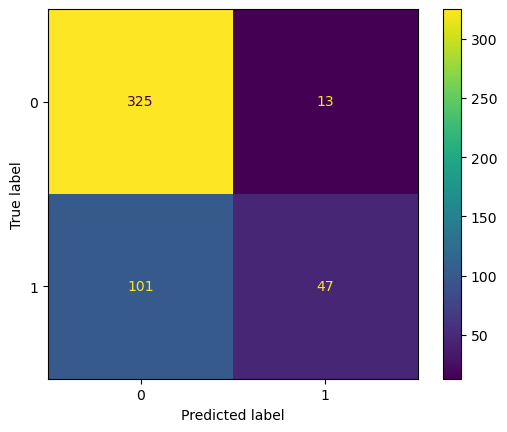

In [36]:
ConfusionMatrixDisplay.from_estimator(clfu, X_test_loru, y_test_loru);

In [37]:
y_predu = clfu.predict(X_test_loru)

print(classification_report(y_test_loru, y_predu, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.76      0.96      0.85       338
         Yes       0.78      0.32      0.45       148

    accuracy                           0.77       486
   macro avg       0.77      0.64      0.65       486
weighted avg       0.77      0.77      0.73       486



Precision : Die Präzision für die Klasse "No" beträgt 0,76, während die Präzision für die Klasse "Yes" bei 0,78 liegt. Die Präzision misst den Anteil der wahren positiven Vorhersagen (korrekt vorhergesagte "No" bzw. "Yes") im Verhältnis zu allen positiven Vorhersagen (sowohl korrekt als auch falsch). Eine höhere Präzision deutet darauf hin, dass das Modell weniger falsch positive Vorhersagen gemacht hat.

Recall: Der Recall für die Klasse "No" beträgt 0,96, während der Recall für die Klasse "Yes" bei 0,32 liegt. Der Recall misst den Anteil der wahren positiven Vorhersagen im Verhältnis zu allen tatsächlichen positiven Fällen. Ein höherer Recall bedeutet, dass das Modell weniger falsch negative Vorhersagen gemacht hat.

F1-Score: Der F1-Score ist ein harmonisches Mittelmaß zwischen Precision und Recall und beträgt 0,85 für die Klasse "No" und 0,45 für die Klasse "Yes". Ein hoher F1-Score deutet darauf hin, dass das Modell sowohl eine gute Präzision als auch einen guten Recall für diese Klasse aufweist.

Accuracy : Die Accuracy des Modells beträgt 0,77, was bedeutet, dass etwa 77 % der Vorhersagen korrekt sind.
Macro Avg und Weighted Avg: Diese Werte sind Durchschnittswerte für Precision, Recall und F1-Score. Der "Macro Avg" berechnet den Durchschnitt über alle Klassen mit gleicher Gewichtung, während der "Weighted Avg" die Klassen basierend auf ihrer Unterstützung gewichtet. In diesem Fall sind die Werte für "Macro Avg" und "Weighted Avg" ähnlich, da die Anzahl der Fälle aufgrund des Under-Sampling in beiden Klassen weniger variiert.

Zusammenfassend zeigt der Bericht, dass das Modell für das Ereignis "keine Fans" bessere Voraussagen trifft als für den Fall, dass eein Profil Fans generiert.

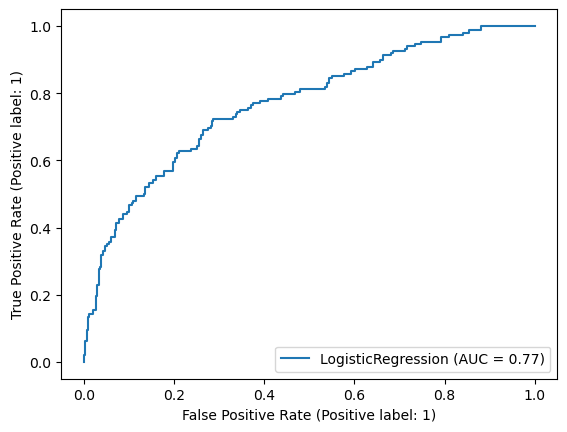

In [38]:
RocCurveDisplay.from_estimator(clfu, X_test_loru, y_test_loru) ;

In [39]:
y_score_loru = clfu.predict_proba(X_test_loru)[:, 1]
roc_auc_score(y_test_loru, y_score_loru)

0.7687110187110187

Der ROC-AUC-Wert (Receiver Operating Characteristic - Area Under the Curve) beträgt 0,7687. Dieser misst die Fähigkeit des Modells, wahre positive Raten (True Positive Rate) und falsche positive Raten (False Positive Rate) zu unterscheiden, indem die Fläche unter der ROC-Kurve berechnet.

Eine ROC-AUC-Wert von 0,7687 zeigt an, dass das Modell eine zufriedenstellende Fähigkeit zur Unterscheidung zwischen den beiden Klassen ("No" und "Yes") aufweist.

esonders wichtig ist der ROC-AUC-Wert in diesem Modell, da die Klassenverteilung unausgeglichen ist, was bedeutet, dass es mehr Profile ohne Fans ("No") gibt als solche mit Fans ("Yes"). Zudem sind die Konsequenzen von falsch positiven und falsch negativen Vorhersagen unterschiedlich. Das bedeutet, dass das Modell erfolgreich darin ist, die Klassen trotz dieser Herausforderungen zu unterscheiden.

#### 3.2.3 Results research question

Zur Vorhersage, ob ein Profil Fans generiert oder nicht, wurden in der Modellierung vier potenzielle Predictorvariablen berücksichtigt. Dazu gehören "counts_profileVisits," "counts_details," "counts_pictures," und "counts_kisses." Diese Variablen wurden auf ihre Beziehung zur untersuchten Responsevariablen "fans" hin analysiert.

In diesem Kontext zeigt sich, dass "counts_profileVisits," "counts_details" und "counts_pictures" alle einen positiven Zusammenhang zur Wahrscheinlichkeit aufweisen, dass ein Profil Fans generiert. Das bedeutet, je mehr Besucher ein Profil hat, desto wahrscheinlicher ist es, dass es Fans generiert. Ebenso verhält es sich mit der Anzahl der hochgeladenen Bilder und der Fülle an Details auf dem Profil. Interessanterweise ist der Zusammenhang zwischen der Anzahl der befüllten Details und der Generierung von Fans am stärksten ausgeprägt. Dies deutet darauf hin, dass das Hinzufügen von Informationen auf dem Profil einen entscheidenden Einfluss darauf hat, ob ein Nutzer zum Fan wird oder nicht.

Auf der anderen Seite zeigt die vierte Prädiktorvariable, "counts_kisses," einen negativen Zusammenhang. Dies kann möglicherweise dadurch erklärt werden, dass Nutzer, die ein Profil besuchen, sich tendenziell entscheiden, ob sie diesem Profil folgen und somit zu Fans werden, oder ob sie alternativ virtuelle Küsse hinterlassen, um ihr Interesse zu zeigen.

Für dieses Modell liegt der Fokus darauf, falsch positive Vorhersagen zu minimieren, da das Hauptziel der Nutzer darin besteht, andere Personen auf der Plattform kennenzulernen und Fans zu generieren. Daher ist die Erkenntnis, wie Fans generiert werden können, von größerer Bedeutung als die Vorhersage, wie keine Fans generiert werden können. Aus diesem Grund sollte der Schwellenwert für das Modell tendenziell eher höher angesetzt werden, um die Wahrscheinlichkeit von falsch positiven Vorhersagen zu reduzieren. Dennoch ist es entscheidend, ein Gleichgewicht in den Vorhersagen aufrechtzuerhalten, um sicherzustellen, dass die Modellleistung insgesamt akzeptabel bleibt.

Angesichts der Ungleichverteilung der Daten (im Verhältnis 1:3) ist die Genauigkeit der Vorhersagen, insbesondere für die korrekt negativ vorhergesagten Werte, hoch. Dies deutet darauf hin, dass das Modell dazu neigt, Profilen, die tatsächlich keine Fans generieren, korrekt als solche zu identifizieren. Die Anwendung von Under-Sampling hatte dabei einen positiven Einfluss auf die Güte des Modells und hat dazu beigetragen, die Ausgewogenheit zu verbessern.

Die Analysen helfen dabei, die Bedeutung der Predictorvariablen und die Auswirkungen auf die Generierung von Fans auf Dating-Plattformen besser zu verstehen.

## 4. Discussion + Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.

#### 4.1 Summary

In unserem Projekt haben wir uns eingehend mit weiblichen Nutzerprofilen aus dem Jahr 2015 auf der Dating-Plattform Lovoo beschäftigt, um die Voraussetzungen zu identifizieren, die ein Profil erfüllen muss, um seine Chancen auf virtuelle Interaktion zu erhöhen. Diese Erkenntnisse gehen über die Erfolgsoptimierung von Profilen hinaus und ermöglichen Einblicke in soziokulturelle Dynamiken und digitale Kommunikationsstrategien.

Unsere Forschungsfragen und Hypothesen gliederten sich in zwei Hauptthemen:

Hypothese 1 - Lineare Regression: Hier haben wir untersucht, welche Faktoren die Anzahl der Profilbesuche beeinflussen. Unsere Hypothese lautete, dass die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, die Anzahl der Profilbesuche und generierten Küsse sowie das Alter der Person signifikante Einflussfaktoren auf die Anzahl der Profilbesuche sind. Tatsächlich konnten wir feststellen, dass insbesondere das Hochladen neuer Bilder und das Hinzufügen neuer Informationen auf dem Profil einen erheblichen Einfluss auf die Anzahl der Profilbesuche haben. Unsere lineare Regression ermöglichte es uns, die Auswirkungen dieser Faktoren quantitativ zu bewerten. Obwohl unser Modell einen akzeptablen R^2-Score aufwies, stellten wir fest, dass die vorhergesagten Werte von den tatsächlichen Ergebnissen in einigen Fällen erheblich abwichen, insbesondere bei Profilen mit wenig Interaktion.

Hypothese 2 - Logistische Regression: In dieser Hypothese haben wir uns darauf konzentriert, welche Merkmale eines Profils dazu beitragen, Fans zu generieren, das heißt, andere Nutzer dazu zu bewegen, dem Profil zu folgen. Unsere Annahme war, dass die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, die Anzahl der Profilbesuche, generierte Küsse und das Alter der Person signifikante Prädiktoren für das Generieren von Fans sind. Tatsächlich stellten wir fest, dass die Anzahl der Profilbesuche, die Anzahl der Details auf dem Profil und die Anzahl der hochgeladenen Bilder einen positiven Einfluss auf die Wahrscheinlichkeit hatten, Fans zu generieren, während die Anzahl der virtuellen Küsse einen negativen Einfluss hatte. Unser logistisches Regressionsmodell half uns dabei, diese Zusammenhänge zu quantifizieren.

Insgesamt liefern unsere Ergebnisse wertvolle Einblicke in die Dynamiken von Dating-Plattformen und die Bedeutung von Profilgestaltung und -interaktionen. Unsere Untersuchungen tragen nicht nur zur individuellen Optimierung von Profilen bei, sondern werfen auch Licht auf die komplexen soziokulturellen Aspekte und digitalen Kommunikationsstrategien, die in solchen Online-Communities eine Rolle spielen.

#### 4.2 Limitations

Folgende Limitierung sollten bei der Interpretation der Ergebnisse berücksichtigt werden müssen:

1. *Datierungsaspekt*: Die Datenerhebung erfolgte im Frühjahr 2015, was bedeutet, dass die Daten bereits relativ alt sind. In der schnelllebigen Welt der Online-Dating-Plattformen können sich Nutzerverhalten und -präferenzen im Laufe der Zeit erheblich verändern. Daher könnten unsere Erkenntnisse möglicherweise nicht mehr vollständig auf die aktuellen Gegebenheiten übertragen werden.

2. *Einseitige Datenerhebung*: Die Datenerhebung erfolgte durch gezielte Erfassung von Nutzerprofilinformationen auf Lovoo. Dies führte dazu, dass der Datensatz stark einseitig ist, da er ausschließlich weibliche Nutzerprofile enthält. Diese Beschränkung erschwert die Generalisierung unserer Ergebnisse auf andere Geschlechter oder Altersgruppen erheblich. Um umfassendere Erkenntnisse zu gewinnen, wäre eine separate Datenerhebung mit entsprechenden Profilen notwendig gewesen.

3. *Einschränkungen des Algorithmus*: Der Empfehlungsalgorithmus von Lovoo tendierte dazu, häufig dieselben Nutzerprofile auszugeben. Dies kann darauf hinweisen, dass der Algorithmus stark auf Faktoren wie den Standort und möglicherweise Cookies angewiesen war, um Nutzer in der Nähe zu empfehlen. Dies führte zu einer Begrenzung der Anzahl der unterschiedlichen Nutzerprofile in unserem Datensatz.

4. *Ethische Aspekte*: Bei der Datenerhebung ist es wichtig, ethische Aspekte zu berücksichtigen. Die Erstellung von gefälschten Profilen und die Sammlung von Daten ohne das explizite Einverständnis der Nutzer könnten ethische Bedenken hervorrufen. Es ist daher entscheidend, sicherzustellen, dass bei der Durchführung solcher Studien ethische Standards eingehalten werden.

Trotz dieser Begrenzungen bieten unsere Ergebnisse wertvolle Einblicke in die Welt der Online-Dating-Plattformen und liefern relevante Informationen zur Profilgestaltung und -interaktion. Dennoch sollte bei der Interpretation und Anwendung der Ergebnisse immer bedacht werden, dass sie auf spezifische Bedingungen und Zeitpunkte zutreffen und nicht uneingeschränkt verallgemeinert werden können.

#### 4.3 Ideas for future work

Die Erforschung von Online-Dating-Plattformen hat in den letzten Jahren erhebliche Aufmerksamkeit erregt, da sie Einblicke in das komplexe Wechselspiel menschlicher Interaktion und digitaler Technologien bietet. Während unsere aktuelle Studie die Profile weiblicher Nutzer auf der Lovoo-Plattform analysierte und wertvolle Erkenntnisse über die Erfolgsfaktoren auf dieser speziellen Plattform lieferte, gibt es immer noch viele unerforschte Bereiche, die weiter untersucht werden können. In diesem Sinne schlagen wir drei faszinierende Forschungsrichtungen vor, die dazu beitragen könnten, das Verständnis für Online-Dating zu vertiefen und die soziokulturellen Aspekte sowie die Dynamiken der digitalen Kommunikation auf diesen Plattformen zu beleuchten. Diese Forschungsbereiche umfassen ethnische und kulturelle Untersuchungen, die Berücksichtigung verschiedener Plattformen und Langzeitstudien mit einer Bewertung des Nutzererfolgs. Jede dieser Richtungen eröffnet die Möglichkeit, neue Erkenntnisse zu gewinnen und das Wissen über Online-Dating und seine Auswirkungen auf das menschliche Verhalten zu erweitern.

1. *Ethnische und kulturelle Untersuchungen*: Eine interessante Richtung für zukünftige Forschung wäre die Untersuchung, wie ethnische und kulturelle Unterschiede die Interaktion und den Erfolg auf Online-Dating-Plattformen beeinflussen. Dies könnte Einblicke in die Vielfalt der Online-Dating-Erfahrungen bieten und dazu beitragen, wie Plattformen auf kulturelle Sensibilität reagieren können.
   
3. *Berücksichtigung verschiedener Plattformen*: Da Ihre aktuelle Studie sich auf Lovoo konzentriert hat, könnte zukünftige Forschung mehrere Online-Dating-Plattformen in Betracht ziehen, um Unterschiede und Gemeinsamkeiten in Bezug auf Profilinteraktion und Erfolgsfaktoren zu analysieren. Dies würde dazu beitragen, branchenweite Trends besser zu verstehen und zu vergleichen.
   
5. *Langzeitstudien mit Erfolgsbewertung*: Langzeitstudien, die das Nutzerverhalten und das Profilinteraktionsmuster im Laufe der Zeit verfolgen, könnten äußerst aufschlussreich sein. Es wäre wichtig, den Erfolg der Nutzer im Laufe der Zeit zu bewerten, um festzustellen, ob die auf den Plattformen angewandten Strategien langfristig erfolgreich sind oder sich im Laufe der Zeit ändern. Dies könnte Einblicke in die Nachhaltigkeit von Online-Dating-Beziehungen bieten.